## I. Calculate the F1 Scrore
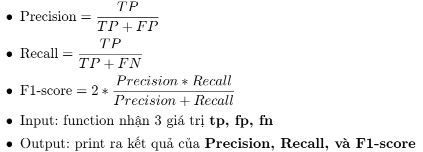
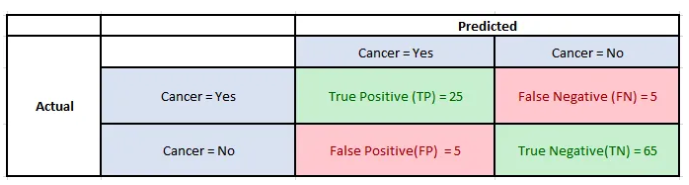

In [8]:
import math
import numpy as np
"""
    NOTE: Đề bài yêu cầu các điều kiện sau
    • Phải kiểm tra giá trị nhận vào tp, fp, fn là type int, nếu là type khác thì print ví dụ
    check fn là float, print ’fn must be int’ và thoát hàm hoặc dừng chương trình.
    • Yêu cầu tp, fp, fn phải đều lớn hơn 0, nếu không thì print ’tp and fp and fn must be
    greater than zero’ và thoát hàm hoặc dừng chương trình
"""

def cal_f1(tp, fp, fn):
    """
    This is the function use to calculate the f1 score
    args: tp -> Int
          fp -> Int
          fn -> Int

    return 
        - except ValueError if input contains not int
        - None if input <= 0
        - f1 Score
    """
    try:
        tp = int(tp)
        fp = int(fp)
        fn = int(fn)
    except ValueError as e_int_convert:
        return e_int_convert

    if not all(i > 0 for i in [tp, fp, fn]):
        print('tp and fp and fn must be greater than zero')
        return None

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * precision * recall / (precision + recall)
    return f1

print(cal_f1(1, 2, "H"))

invalid literal for int() with base 10: 'H'


### I.1 Additional Calculate the Accuracy
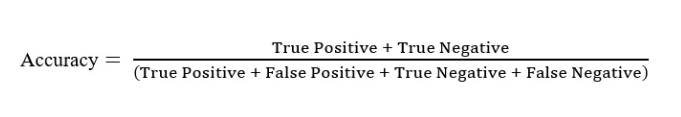

In [10]:
def cal_f1_accuracy(tp, tn, fp, fn):
    """
    This is the function use to calculate the f1 score and the accuracy
    args: tp -> Int
          tn -> Int
          fp -> Int
          fn -> Int

    return 
        - except ValueError if input contains not int
        - None if input <= 0
        - tuple(f1, accuracy)
    """
    try:
        tp = int(tp)
        tn = int(tn)
        fp = int(fp)
        fn = int(fn)
    except ValueError as e_int_convert:
        return e_int_convert

    if not all(i > 0 for i in [tp, tn, fp, fn]):
        print('tp and fp and fn must be greater than zero')
        return None

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * precision * recall / (precision + recall)
    accuracy = (tp + tn) / (tp + tn + fp + fn) # (true / total number of predict inputs)
    return f1,accuracy

print(cal_f1_accuracy(1,2,3,4))

(0.22222222222222224, 0.3)


## II. Calculate Activation Function

### II.1 Sigmoid Function
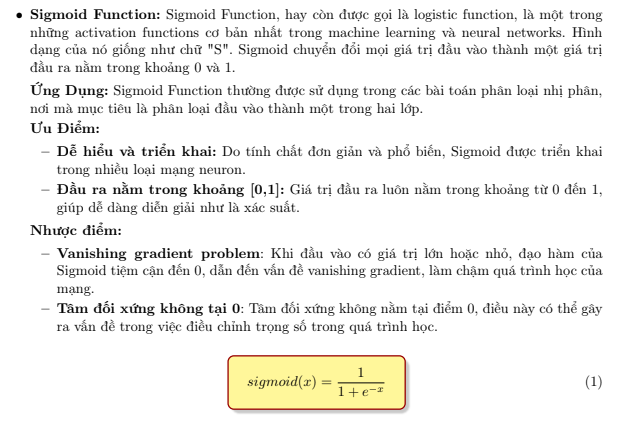
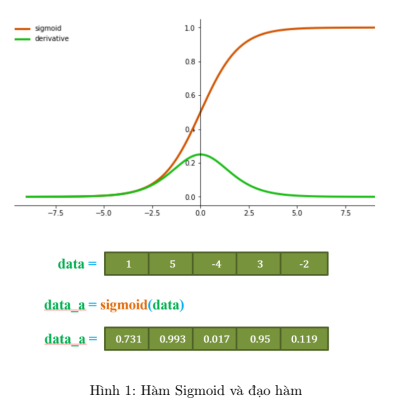

In [11]:
def sigmoid(input):
    """
    This is the function use to calculate the sigmoid function for list of inputs

    args: list(float)

    return 
        - except ValueError if input can not convertted to float
        - list of sigmoid value
    """
    try:
        value = [float(x) for x in input]
    except ValueError as e_int_convert:
        return e_int_convert
    return [1 / (1 + math.exp(-x)) for x in input]

data = [1,5,-4,3,-2]

sigmoid(data)

[0.7310585786300049,
 0.9933071490757153,
 0.01798620996209156,
 0.9525741268224334,
 0.11920292202211755]

### II.2 ReLU Function
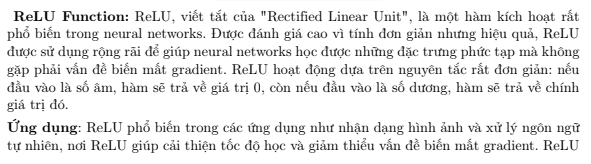
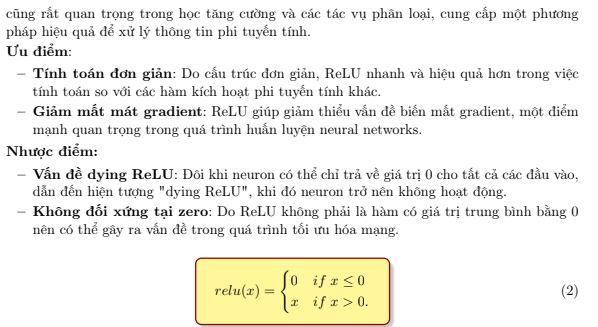
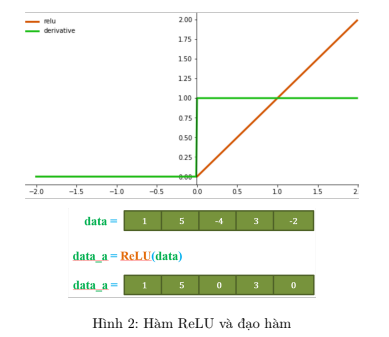

In [1]:
def relu(input):
    """
    This is the function use to calculate the relu function for list of inputs

    args: list(float)

    return
        - except ValueError if input can not convertted to float
        - list of relu value
    """
    try:
        value = [float(x) for x in input]
    except ValueError as e_int_convert:
        return e_int_convert
    return [x if x > 0 else 0 for x in input]

data = [1,5,-4,3,-2]

relu(data)

[1, 5, 0, 3, 0]

### II.3 ELU Function
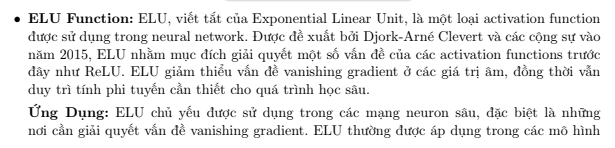
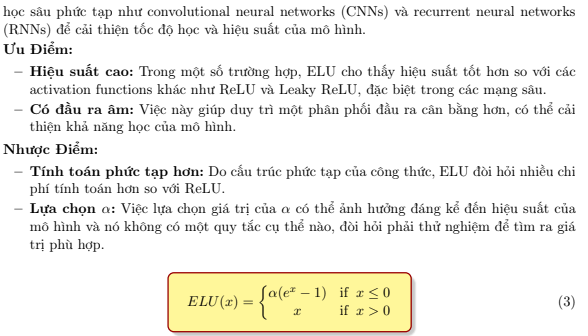
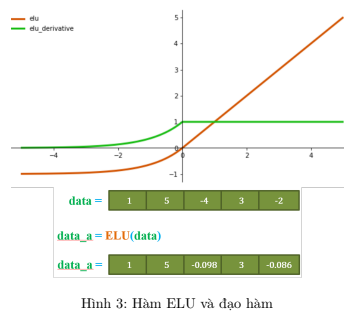

In [4]:
def elu(input, alpha = 1.0):
    """
    This is the function use to calculate the elu function for list of inputs

    args: list(float)

    return
        - except ValueError if input can not convertted to float
        - list of elu value
    """
    try:
        value = [float(x) for x in input]
    except ValueError as e_int_convert:
        return e_int_convert
    return [x if x > 0 else alpha*(math.exp(x) - 1) for x in input]

data = [-2 , -1, 0, 1, 2]

elu(data)

[-0.8646647167633873, -0.6321205588285577, 0.0, 1, 2]

### II. Summary Create calculate_activation_function Class Object

In [6]:
list_name_activation_function_available = ['sigmoid', 'relu', 'elu']

class calculate_activation_function:
    """
    This is the class use to calculate the activation function for list of inputs

    List of activation function available: sigmoid, relu, elu

    args: list(float,int), activation_function, alpha = 1.0 (optional)

    return
        - except ValueError if activation function not available and calculate_activation_function.result = None
        - list of activation function value corresponding to the activation function input

    data_sample = [1,5,-4,3,-2]
    result = calculate_activation_function(data_sample, activation_function = 'sigmoid').result

    """
    def __init__(self, x, activation_function, alpha = 1.0):
        if activation_function not in list_name_activation_function_available:
            raise ValueError('activation function not available')
        self.x = x
        self.alpha = alpha
        if activation_function == 'sigmoid':
            self.result = self.sigmoid()
        elif activation_function == 'relu':
            self.result = self.relu()
        elif activation_function == 'elu':
            self.result = self.elu()
        else:
            self.result = None
            raise ValueError('activation function not available')
    
    def sigmoid(self):
        """
        This is the function use to calculate the sigmoid function for list of inputs

        args: list(float)

        return 
            - except ValueError if input can not convertted to float
            - list of sigmoid value
        """
        try:
            value = [float(x_ele) for x_ele in self.x]
        except ValueError as e_int_convert:
            return e_int_convert
        return [1 / (1 + math.exp(-x_ele)) for x_ele in self.x]    

    def relu(self):
        """
        This is the function use to calculate the relu function for list of inputs

        args: list(float)

        return
            - except ValueError if input can not convertted to float
            - list of relu value
        """
        try:
            value = [float(x_ele) for x_ele in self.x]
        except ValueError as e_int_convert:
            return e_int_convert
        return [x_ele if x_ele > 0 else 0 for x_ele in self.x]

    def elu(self):
        """
        This is the function use to calculate the elu function for list of inputs

        args: list(float)

        return
            - except ValueError if input can not convertted to float
            - list of elu value
        """
        try:
            value = [float(x_ele) for x_ele in self.x]
        except ValueError as e_int_convert:
            return e_int_convert
        return [x_ele if x_ele > 0 else self.alpha*(math.exp(x_ele) - 1) for x_ele in self.x]

In [7]:
data_sample = [1,5,-4,3,-2]
result = calculate_activation_function(data_sample, activation_function = 'sigmoid').result
print(result)

[0.7310585786300049, 0.9933071490757153, 0.01798620996209156, 0.9525741268224334, 0.11920292202211755]


## III. Calculate the Regression Loss Funtion

### III.1. Calculate MAE (Mean absolute error)
<p>
The Mean Squared Error measures how close a regression line is to a set of data points. It is a risk function corresponding to the expected value of the squared error loss. 

Mean square error is calculated by taking the average, specifically the mean, of errors squared from data as it relates to a function.

 A larger MSE indicates that the data points are dispersed widely around its central moment (mean), whereas a smaller MSE suggests the opposite. A smaller MSE is preferred because it indicates that your data points are dispersed closely around its central moment (mean). It reflects the centralized distribution of your data values, the fact that it is not skewed, and, most importantly, it has fewer errors (errors measured by the dispersion of the data points from its mean).
 </p>

 **Note**: Lesser the MSE => Smaller is the error => Better the estimator.
 <br>
 <br>
 **Formulas:**:
  <br>
 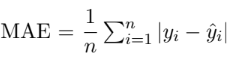

In [12]:
def MAE_calculate(y_true, y_pred, size):
    """
    This is the function use to calculate the Mean Absolute Error

    args: list(float), list(float)

    return
        - except ValueError if input can not convertted to float
        - ValueError if size not match
        - Mean Absolute Error
    """
    try:
        y_true = [float(x) for x in y_true]
        y_pred = [float(x) for x in y_pred]
    except ValueError as e_int_convert:
        return e_int_convert
    
    if size != len(y_true) or size != len(y_pred):
        return ValueError('Size not match. The size of y_true and y_pred must be the same. The size of y_true is {} and y_pred is {}'.format(len(y_true), len(y_pred)))
    
    return np.sum([np.absolute(y_true[i] - y_pred[i]) for i in range(len(y_true))]) / len(y_true)

### III.Calculate MSE (Mean Squared Error)

<p>
The Mean Squared Error or Mean Squared Deviation (MSD) of an estimator measures the average of error squares i.e. the average squared difference between the estimated values and true value. It is a risk function, corresponding to the expected value of the squared error loss. It is always non – negative and values close to zero are better. The MSE is the second moment of the error (about the origin) and thus incorporates both the variance of the estimator and its bias
</p>

**Formulas**:
<br>
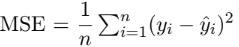

In [13]:
def MSE_Calculate(y_true, y_pred,size):
    """
    This is the function use to calculate the Mean Squared Error

    args: list(float), list(float)

    return
        - except ValueError if input can not convertted to float
        - ValueError if size not match
        - Mean Squared Error
    """
    try:
        y_true = [float(x) for x in y_true]
        y_pred = [float(x) for x in y_pred]
    except ValueError as e_int_convert:
        return e_int_convert

    if size != len(y_true) or size != len(y_pred):
        return ValueError('Size not match. The size of y_true and y_pred must be the same. The size of y_true is {} and y_pred is {}'.format(len(y_true), len(y_pred)))
    
    return np.sum([np.power((y_true[i] - y_pred[i]),2) for i in range(len(y_true))]) / len(y_true)

### III.3. Calculate RMSE

<p>
As mention above, Mean Square error is one such error metric for judging the accuracy and error rate of any machine learning algorithm for a regression problem. So, MSE is a risk function that helps us determine the average squared difference between the predicted and the actual value of a feature or variable.

RMSE is an acronym for Root Mean Square Error, which is the square root of value obtained from Mean Square Error function.

Using RMSE, we can easily plot a difference between the estimated and actual values of a parameter of the model.

**Note**: (By persional opinion):
Usually, a RMSE score of less than 180 is considered a good score for a moderately or well working algorithm. In case, the RMSE value exceeds 180, we need to perform feature selection and hyper parameter tuning on the parameters of the model.
</p>

**Formulas**:
<br>
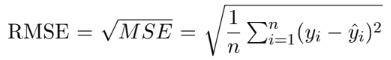

In [ ]:
def RMSE_Calculate(y_true, y_pred, size):
    """
    This is the function use to calculate the Root Mean Squared Error

    args: list(float), list(float)

    return
        - except ValueError if input can not convertted to float
        - ValueError if size not match
        - Root Mean Squared Error
    """
    try:
        y_true = [float(x) for x in y_true]
        y_pred = [float(x) for x in y_pred]
    except ValueError as e_int_convert:
        return e_int_convert
    
    if size != len(y_true) or size != len(y_pred):
        return ValueError('Size not match. The size of y_true and y_pred must be the same. The size of y_true is {} and y_pred is {}'.format(len(y_true), len(y_pred)))
    
    return np.sqrt(np.sum([np.power((y_true[i] - y_pred[i]),2) for i in range(len(y_true))]) / len(y_true))

### III. Summary Create calculate_regression_loss_function Class Object

In [ ]:
class calculate_regression_loss_function:
    def __init__(self, y_true, y_pred, size, loss_function):
        self.y_true = y_true
        self.y_pred = y_pred
        self.size = size
        self.loss_function = loss_function
        if loss_function == 'MAE':
            self.result = self.MAE()
        elif loss_function == 'MSE':
            self.result = self.MSE()
        elif loss_function == 'RMSE':
            self.result = self.RMSE()
        else:
            self.result = None
            raise ValueError('loss function not available')
    
    def MAE_calculate(self):
        """
        This is the function use to calculate the Mean Absolute Error

        args: list(float), list(float)

        return
            - except ValueError if input can not convertted to float
            - ValueError if size not match
            - Mean Absolute Error
        """
        try:
            self.y_true = [float(x) for x in self.y_true]
            self.y_pred = [float(x) for x in self.y_pred]
        except ValueError as e_int_convert:
            return e_int_convert
        
        if self.size != len(y_true) or self.size != len(self.y_pred):
            return ValueError('Size not match. The size of y_true and y_pred must be the same. The size of y_true is {} and y_pred is {}'.format(len(self.y_true), len(self.y_pred)))
        
        return np.sum([np.absolute(self.y_true[i] - self.y_pred[i]) for i in range(len(self.y_true))]) / len(self.y_true)
    
    def MSE_Calculate(self):
        """
        This is the function use to calculate the Mean Squared Error

        args: list(float), list(float)

        return
            - except ValueError if input can not convertted to float
            - ValueError if size not match
            - Mean Squared Error
        """
        try:
            self.y_true = [float(x) for x in self.y_true]
            self.y_pred = [float(x) for x in self.y_pred]
        except ValueError as e_int_convert:
            return e_int_convert

        if self.size != len(self.y_true) or self.size != len(self.y_pred):
            return ValueError('Size not match. The size of y_true and y_pred must be the same. The size of y_true is {} and y_pred is {}'.format(len(self.y_true), len(self.y_pred)))
        
        return np.sum([np.power((self.y_true[i] - self.y_pred[i]),2) for i in range(len(self.y_true))]) / len(self.y_true)
    
    def RMSE_Calculate(self):
        """
        This is the function use to calculate the Root Mean Squared Error

        args: list(float), list(float)

        return
            - except ValueError if input can not convertted to float
            - ValueError if size not match
            - Root Mean Squared Error
        """
        try:
            self.y_true = [float(x) for x in self.y_true]
            self.y_pred = [float(x) for x in self.y_pred]
        except ValueError as e_int_convert:
            return e_int_convert
        
        if self.size != len(self.y_true) or self.size != len(self.y_pred):
            return ValueError('Size not match. The size of y_true and y_pred must be the same. The size of y_true is {} and y_pred is {}'.format(len(self.y_true), len(self.y_pred)))
        
        return np.sqrt(np.sum([np.power((self.y_true[i] - self.y_pred[i]),2) for i in range(len(self.y_true))]) / len(self.y_true))